# 비용함수를 최소화하는 해석학적 방법
- 정규 방정식(Normal equation)
    - 데이터와 레이블들에서 다항 행렬의 역행렬 취하여 직접 가중치 행렬을 구한다.
- 특잇값 분해(Singular value decomposition)
    - 유사역행렬은 항상 존재함: 역행렬이 존재하지 않는 경우에도 동작
    - 계산량 정규방정식에 비해 적음

In [1]:
import numpy as np

# 무작위 선형 데이터 생성
X= 2* np.random.rand(100,1)
X_b= np.c_[np.ones((100,1)), X]

#y = wX+ b + nosise
y= 4+3*X+np.random.randn(100,1)

# 정규방정식 해(가중치 행렬)구하기
theta_best= np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[3.82654391],
       [3.02386291]])

In [2]:
#가중치 행렬 통해 예측하기
X_new = np.array([[0],[2]])
X_new_b= np.c_[np.ones((2,1)), X_new]
y_predict= X_new_b.dot(theta_best)
y_predict

array([[3.82654391],
       [9.87426974]])

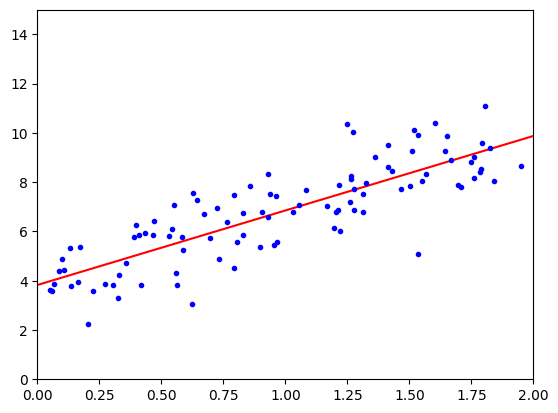

In [3]:
import matplotlib.pyplot as plt
plt.plot(X_new, y_predict, "r-")
plt.plot(X,y,"b.")
plt.axis([0,2,0,15])
plt.show()

### 사이킷런 선형회귀와 비교

In [4]:
from sklearn.linear_model import LinearRegression
lin_reg= LinearRegression()
lin_reg.fit(X, y)

print(lin_reg.intercept_, lin_reg.coef_)
print(lin_reg.predict(X_new))

[3.82654391] [[3.02386291]]
[[3.82654391]
 [9.87426974]]


# 비용함수를 최적화하는 최적화 방법
- 정규방정식은 O(파라미터수^2)
- 파라미터 수가 많을 때, 샘플 수가 많아 메모리에 담을 수 없을 때 비용함수 최적화에 경사하강법 활용

### 경사하강법
- 비용함수가 볼록함수인가?
    - 하나의 지역 최솟값 보장: 지역 최솟값, 평면에 갇힘등 발생 하지않음
    - 연속된 기울기가 갑자기 변하지않는 함수: 미분 가능함
- 방법
    - 파라미터 벡터 무작위 초기화
    - parameter_vector_i에 대해 편미분 방정식 구함
    - 현재 값에서의 편미분값 구함
    - 다음 가중치 = 현재가중치 - 학습률x편미분값
- 특성의 스케일을 정규화 시키지않으면 특정 특성에 의해 최솟값 도달 오래 걸림

### 배치 경사하강법
- 매 스텝에서 전체 훈련세트에 대해 계산
- 반복 횟수
    - 너무 크면 오래 걸린다, 너무 작으면 최솟값에 수렴하지 못 한다.
    - 어떻게 결정해야하는가?
        - 반복횟수를 아주 크게 설정하고, 그래디언트 벡터크기(Norm)가 특정 크기보다 작아지면 정지

In [8]:
#학습률
eta= 0.1 
n_iter=1000
m=100

theta= np.random.randn(2,1)

for it in range(n_iter):
    gradients= 2/m*X_b.T.dot(X_b.dot(theta)-y)
    theta= theta- eta*gradients
theta

array([[3.82654391],
       [3.02386291]])

### 확률적 경사하강법(SGD)
- 매 스텝에 무작위 샘플 하나에 대해서만 그래디언트 계산
- 무작위성
    - 장점: 지역최솟값 탈출 가능
    - 단점
        - 평균적 수렴=요동치면서 이동=학습횟수 종료시 최적값 아닐 수 있음
        - 매번 샘플을 랜덤하게 섞어야 모든 샘플 사용하도록 할 수 있음(수렴시간 증가)
- 학습 스케줄링으로 해결
    - 처음에는 지역 최솟값에 빠지지않게 큰 학습률
    - 점진적으로 학습률 작게하여 최솟값에 수렴하도록함
    
### 미니배치 경사하강법
- 임의의 작은 샘플 세트에 확률적 경사하강법 적용     

In [12]:
n_epochs =50
# 학습 스케줄 파라미터
t0, t1= 5, 50

def learning_schedule(t):
    return t0/(t+t1)

theta= np.random.randn(2,1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index= np.random.randint(m)
        xi= X_b[random_index:random_index+1]
        yi= y[random_index:random_index+1]
        gradients= 2 * xi.T.dot(xi.dot(theta)-yi)
        eta=learning_schedule(epoch*m+i)
        theta= theta- eta*gradients
        
theta        

array([[3.81887006],
       [3.06613807]])

In [14]:
from sklearn.linear_model import SGDRegressor
sgd_reg= SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

sgd_reg.intercept_, sgd_reg.coef_

(array([3.81455936]), array([3.03536656]))